# Utility Tests

This notebook contains some utilization tests to be performed on the data before and after anonymization.
It also contains some statistics on the data taken before and after anonymization

## 1) **Sentiment Analysis**

(1) sentiment analysis score of the data (supervised) - MNB - change to XGBOOST

(2) sentiment analysis score of the data (un-suprevised) - VADER  & HuggingFace

(3) some statistics about the data (TBD  Pos, len of sentences etc..)



### 1.1) First function using VADER

The following function returns a prediction for sentiment in a range of [-1,1] where -1 is negative and 1 i positive.

VADER (Valence Aware Dictionary and sEntiment Reasoner) Lexicon is a lexicon or a dictionary that contains a list of words with their associated sentiment scores. These sentiment scores indicate the degree of positivity, negativity, or neutrality of each word.

VADER Lexicon is specifically designed for sentiment analysis of social media texts like tweets, Facebook posts, and online reviews. It is a rule-based system that uses a combination of lexical and grammatical features to determine the sentiment of a text.

In [1]:
# required imports
import nltk
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')  # download necessary data for sentiment analysis

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [2]:
# Instantiate sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# The function returns a compound sentiment score,
# which is a normalized score between -1 and 1. A score of -1 
# represents highly negative sentiment, a score of 0 represents
# neutral sentiment, and a score of 1 represents highly positive sentimen

def get_sentiment(text):
    return analyzer.polarity_scores(text)['compound']

In [5]:
df = pd.read_csv('df_filtered_1000.csv')

In [ ]:
# Apply sentiment analysis to DataFrame and create new column with results
df['sentiment_pred'] = df['txt'].apply(get_sentiment)  # add a colum to the df

In [ ]:
df.head(4)

### 1.2) Second function using hugging face
https://huggingface.co/blog/sentiment-analysis-python

In [ ]:
pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 105.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 118.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 19.9 MB/s eta 0:00:00


In [ ]:
# required imports
from transformers import pipeline

In [ ]:
def hugging_sentiment(text):
  sentiment_pipeline = pipeline("sentiment-analysis")
  # if we want to insert a corpus and not a single text:
  #  chance "text" with "data" where: data = df['txt'].tolist()
  return sentiment_pipeline(text)  # [{'label': 'POSITIVE', 'score': 0.999708354473114}]

In [ ]:
# This function returns a score from -1 to 1
def hugging_sentiment(text):
  sentiment_pipeline = pipeline("sentiment-analysis")
  # if we want to insert a corpus and not a single text:
  #  chance "text" with "data" where: data = df['txt'].tolist()
  score = sentiment_pipeline(text)[0]['score']
  if sentiment_pipeline(text)[0]['label'] =='NEGATIVE':
    score = score*(-1)
  return score  #  0.999708354473114

### 1.3) Supervised Sentiment Analysis
This analysis is a specific analysis for our dataset which includes labels. In "read world" dataset's we will not have labels, but for the sake of this project and learning the consequence of applying k-anonymity  we will use it to learn about out data utility loss.

In [ ]:
# define the inputs to the function
texts = df.txt
labels = df.sentiment
# labels = df.labels

NameError: ignored

In [ ]:
# required imports
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
def sentiment_test(df): # df should include 'txt' and 'labels' columns [df.txt , sd.labels]
  # split to train test
  train, test = train_test_split(df, test_size=0.2)  # split row's wise
  # define a model
  nb = MultinomialNB()
  # train a model
  nb.fit(train.txt, train.labels)
  # predict
  y_pred = nb.predict(test.txt)
  # return score
  print('Accuracy:', accuracy_score(test.labels, y_pred))
  return accuracy_score(test.labels, y_pred)

## 1.3.1) XGBOOST

In [8]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer


In [6]:
df

,Unnamed: 0,txt,sentiment,num_of_words
0,99,"caution!: these tracks are not the ""original"" ...",0,22
1,461,just awful: this was possibly the worst book i...,0,25
2,493,no lessons learned: this is one of the most di...,0,23
3,578,squeem: i ordered according to the size chart ...,0,21
4,595,"pass: the sizes run really small, it flips up ...",0,25
...,...,...,...,...
941,20710,excellent: prompt delivery. correct parts. you...,1,24
942,20711,purchased minn kota mkp 3 prop from amazon.com...,1,25
943,20738,plantronics bluetooth 665 charger: this charge...,1,28
944,20784,video purchase: like the movie so i bought it....,1,18


In [13]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df["txt"], df["sentiment"], test_size=0.2, random_state=42)

In [14]:
# Use CountVectorizer to convert the text data into numerical features
vectorizer = CountVectorizer(stop_words="english")
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [15]:
# Train an XGBoost model on the training set
model = xgb.XGBClassifier()
model.fit(X_train_vect, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [16]:
# Evaluate the model on the test set
y_pred = model.predict(X_test_vect)
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8210526315789474


In [17]:
# Use the model to make predictions on new data
new_data = pd.DataFrame({"text": ["I love this product!", "This movie was terrible."], "sentiment": [1, 0]})
new_data_vect = vectorizer.transform(new_data["text"])
new_data_pred = model.predict(new_data_vect)
print("New data predictions:", new_data_pred)

New data predictions: [1 0]


In [22]:
from sklearn.model_selection import cross_val_score

X = vectorizer.fit_transform(df["txt"])
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))

Cross-validation scores: [0.85263158 0.81481481 0.84656085 0.78306878 0.78835979]
Mean cross-validation score: 0.8170871623503203


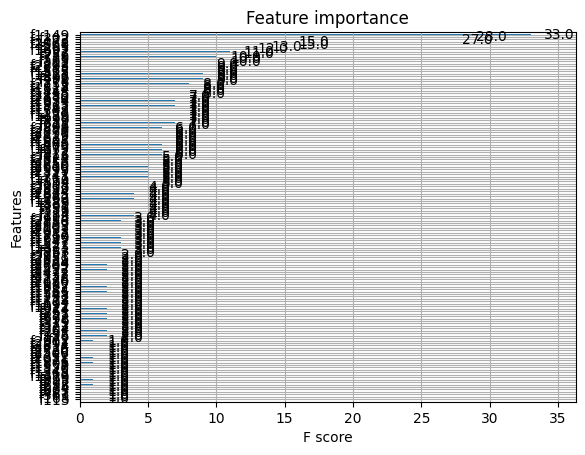

In [24]:
import matplotlib.pyplot as plt

# Train an XGBoost model on your data
model = xgb.XGBClassifier()
model.fit(X, y)

# Plot the feature importances
xgb.plot_importance(model)
plt.show()

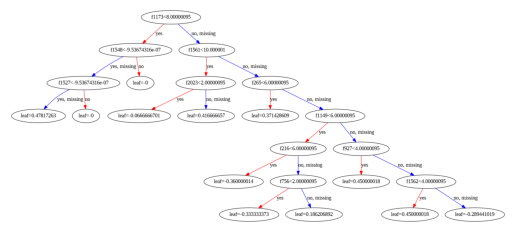

In [25]:
# Plot the first tree in the model
xgb.plot_tree(model, num_trees=0)
plt.show()

In [27]:
X

<946x2943 sparse matrix of type '<class 'numpy.int64'>'
	with 9395 stored elements in Compressed Sparse Row format>

In [28]:
### imports for the following function:
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier


In [ ]:
### A Function to add to git:
def sentiment_xgb(df):
  y = df('sentiment')
  X = vectorizer.fit_transform(df["txt"])
  scores = cross_val_score(model, X, y, cv=5)
  print("Cross-validation scores:", scores)
  print("Mean cross-validation score:", np.mean(scores))
  return np.mean(scores)

In [30]:
## perform randosearch for best hyper param:
# define the RandomizedSearchCV object
# define the XGBoost classifier
xgb_clf = XGBClassifier()

# define the hyperparameter search space
param_dist = {'learning_rate': np.arange(0.01, 0.2, 0.01),
              'n_estimators': range(100, 1000, 100),
              'max_depth': range(3, 10),
              'subsample': np.arange(0.5, 1.0, 0.1),
              'colsample_bytree': np.arange(0.5, 1.0, 0.1),
              'gamma': np.arange(0, 1.5, 0.1)}
rand_search = RandomizedSearchCV(estimator=xgb_clf, param_distributions=param_dist, n_iter=50, scoring='accuracy', cv=5, n_jobs=-1, random_state=42)

# fit the RandomizedSearchCV object to the training data
rand_search.fit(X, y)

# print the best hyperparameters
print("Best Hyperparameters:", rand_search.best_params_)

# print the accuracy score using the best hyperparameters
print("Accuracy Score:", rand_search.best_score_)

Best Hyperparameters: {'subsample': 0.8999999999999999, 'n_estimators': 100, 'max_depth': 9, 'learning_rate': 0.13, 'gamma': 1.1, 'colsample_bytree': 0.8999999999999999}
Accuracy Score: 0.8329713171818435


## 2) Applying these functions oמ our dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import gc
import sklearn
import random
import re
from numpy.linalg import norm
from sklearn.model_selection import train_test_split
from itertools import islice
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [ ]:
# load our dataset
df = pd.read_csv('df_filtered.csv')

In [ ]:
# work on a copy
# embed using glove
df_copy = df.copy()

In [ ]:
# divid to train and test;

from sklearn.model_selection import train_test_split

train, test = train_test_split(df_copy, test_size=0.2)

NameError: ignored

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')  # added

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
### https://www.kaggle.com/code/rohitgadhwar/sentiment-analysis-on-amazon-reviews/notebook
def clean_texts(texts):
    stwords = stopwords.words('english')
    l = len(texts)/10
    temp_texts = []
    for i in range(len(texts)):
        text = re.sub('\d','0',texts[i])
        if 'www.' in text or 'http:' in text or 'https:' in text or '.com' in text: # remove links and urls
            text = re.sub(r"([^ ]+(?<=\.[a-z]{3}))", " ", text)
        
        text = re.sub('[^a-zA-Z]', ' ', text)
        text = text.lower()
        text = text.split()
        text = [word for word in text if not word in stwords] # remove stopwords 
        text = ' '.join(text)
        temp_texts.append(text)
        if i%l==0:
            print('--'+str(int(i/l)*10)+'%', end='')
    print('--100%--Done !')
    return temp_texts

In [ ]:
# clean both train and test data:
print('Processing Training data')
train_texts = clean_texts(train.txt.tolist())
print('\nProcessing Test data')
test_texts = clean_texts(test.txt.tolist())

Processing Training data


NameError: ignored

In [ ]:
# Create figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot count plot of original data on first subplot
sns.countplot(x=train.sentiment, ax=axs[0])
axs[0].set_title('train Data')

# Plot count plot of subsetted data on second subplot
sns.countplot(x=test.sentiment, ax=axs[1])
axs[1].set_title('test Data')

# Show plot
plt.show()

In [ ]:
# converting a collection of text documents to a matrix of token counts. It essentially converts
# a collection of text documents into a sparse matrix, 
# where each row corresponds to a document and each column corresponds to a token in the corpus.

from sklearn.feature_extraction.text import CountVectorizer

print('Fitting data...')
count_vect = CountVectorizer()
count_vect.fit(train.txt) ; print('fit complete !')

print('tranforming training set...')
train_texts_vec = count_vect.transform(train.txt)

print('tranforming test set...')
test_texts_vec = count_vect.transform(test.txt)

### 2.1) VADER:

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')  # download necessary data for sentiment analysis

df = df_copy

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


NameError: ignored

In [ ]:
# Instantiate sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
# Define function to apply sentiment analysis to text
def get_sentiment(text):
    return analyzer.polarity_scores(text)['compound']

In [ ]:
# Apply sentiment analysis to DataFrame and create new column with results
df['sentiment_pred'] = df['txt'].apply(get_sentiment)

In [ ]:
df

In [ ]:
# Plot histogram of numeric column
import matplotlib.pyplot as plt

plt.hist(df['sentiment_pred'], bins=10,density = True)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of ' + "predicted sentiment score")
plt.show()

### 2.2) Hugging Face:

In [ ]:
sentiment_pipeline = pipeline("sentiment-analysis")
data = df['txt'][0]


In [ ]:
sentiment_pipeline(data)[0]['label']

'POSITIVE'

take a portion of the df to apply:

In [ ]:
df_small = df[1:10]

In [ ]:
df_small

,Unnamed: 0,txt,sentiment,num_of_words,sentiment_pred
1,84,voices from the farm: i have a copy of this bo...,1,27,0.6369
2,99,"caution!: these tracks are not the ""original"" ...",0,22,0.0000
3,100,textbook: book shipped quickly and was in exce...,1,16,0.7650
4,135,great graphics!: 2006 coast to coast for pc is...,1,26,0.9180
5,169,awesume! best blocks ever!: this toy was our g...,1,27,0.9078
6,204,haven't found better yet...: this is the only ...,1,20,-0.3412
7,243,it was great!!!: i like it. it was very cool t...,1,21,0.7157
8,269,dockers do the job.: this product was just wha...,1,25,0.1761
9,334,awesome: this is probably the best essay i hav...,1,25,0.9360


In [ ]:
df_small['sentiment_pred'] = df_small['txt'].apply(sentiment_pipeline)

<ipython-input-38-a76ee7ba8bb0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['sentiment_pred'] = df_small['txt'].apply(sentiment_pipeline)


In [ ]:
df_small

,Unnamed: 0,txt,sentiment,num_of_words,sentiment_pred
1,84,voices from the farm: i have a copy of this bo...,1,27,"[{'label': 'POSITIVE', 'score': 0.999708354473..."
2,99,"caution!: these tracks are not the ""original"" ...",0,22,"[{'label': 'NEGATIVE', 'score': 0.999718725681..."
3,100,textbook: book shipped quickly and was in exce...,1,16,"[{'label': 'POSITIVE', 'score': 0.996816694736..."
4,135,great graphics!: 2006 coast to coast for pc is...,1,26,"[{'label': 'POSITIVE', 'score': 0.999879956245..."
5,169,awesume! best blocks ever!: this toy was our g...,1,27,"[{'label': 'POSITIVE', 'score': 0.998973011970..."
6,204,haven't found better yet...: this is the only ...,1,20,"[{'label': 'NEGATIVE', 'score': 0.839851737022..."
7,243,it was great!!!: i like it. it was very cool t...,1,21,"[{'label': 'POSITIVE', 'score': 0.999875664710..."
8,269,dockers do the job.: this product was just wha...,1,25,"[{'label': 'POSITIVE', 'score': 0.999839425086..."
9,334,awesome: this is probably the best essay i hav...,1,25,"[{'label': 'POSITIVE', 'score': 0.999868869781..."


### 2.3) MLP - Supervised Sentiment Analysis

Here we take the MLB, which works relativly well on high dim data (after vectorizing the sentences).
 it's worth noting that MNB is a relatively simple algorithm and may not perform as well as more complex algorithms on certain types of datasets

In [ ]:
## Train a model
from sklearn.naive_bayes import MultinomialNB
train_labels = train.sentiment
test_labels = test.sentiment
nb = MultinomialNB()
nb.fit(train_texts_vec, train_labels)

MultinomialNB()

In [ ]:
y_pred = nb.predict(test_texts_vec)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(test_labels, y_pred))

Accuracy: 0.8806451612903226


In [ ]:
# using cross validation:
# Perform 5-fold cross-validation on the model
print('Fitting data...')
count_vect = CountVectorizer()
count_vect.fit(train.txt) ; print('fit complete !')

print('tranforming training set...')
df_copy_texts_vec = count_vect.transform(df_copy.txt)


Fitting data...
fit complete !
tranforming training set...


In [ ]:
X = df_copy_texts_vec
y = df_copy.sentiment

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
scores = cross_val_score(nb, X, y, cv=5)

NameError: ignored

In [ ]:
# Print the cross-validation scores
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.88064516 0.90645161 0.87096774 0.90322581 0.90645161]
Average cross-validation score: 0.89


## 3) Statistics about our Corpus 
(to be applied before and after anonyimization)

### 3.1) Word frequencies:
 Count the frequency of each word in the corpus to identify the most common words and phrases. This could help you understand the language and tone of the reviews.


In [ ]:
# take the clean text:
clean_txt = clean_texts(df.txt.tolist())
clean_txt[0:3]

NameError: ignored

In [ ]:
# Split the text into words and get the unique words
word_list = ' '.join(clean_txt).split()
word_list[0:10]

['hunting',
 'hard',
 'way',
 'thia',
 'gift',
 'husband',
 'loved',
 'book',
 'arrived',
 'date']

In [ ]:
num_unique = len(set(word_list))
print('Number of unique words:', num_unique)

Number of unique words: 4071


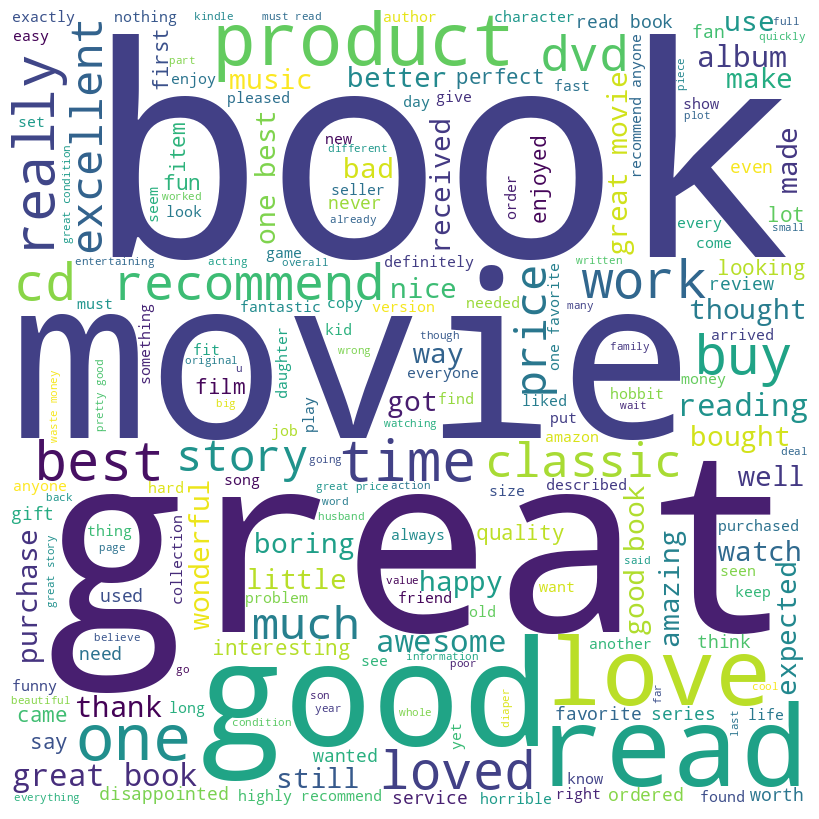

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join the list of words into a single string
text = ' '.join(word_list)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)

# Display the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()



### 3.2) Topic modeling-  TBD
Use unsupervised machine learning techniques to identify the main topics or themes present in the reviews. This could help you understand the key features or characteristics that customers are commenting on.


from GPT: To perform topic modeling on a list of sentences, you can follow these steps:

Preprocess the data: This involves cleaning the text data, removing stop words, and stemming or lemmatizing the words to normalize the text.

Convert the data into a document-term matrix: This involves converting the text data into a matrix where each row represents a document (in this case, a sentence) and each column represents a term (a word in the sentence). The values in the matrix can represent the frequency of the term in the document or some other weighting scheme.

Apply a topic modeling algorithm: There are several algorithms you can use for topic modeling, such as Latent Dirichlet Allocation (LDA) or Non-negative Matrix Factorization (NMF). These algorithms will identify the underlying topics in the text data based on the co-occurrence of terms in the documents.

Evaluate the results: Once you have generated the topics, you should evaluate them to ensure they are meaningful and coherent. You can do this by examining the most frequent words in each topic and checking if they make sense together.

Refine the model: Depending on the evaluation, you may need to refine the model by adjusting parameters or preprocessing steps.

Use the model: Once you have a satisfactory model, you can use it to label new data and gain insights into the underlying topics in the text.

In [ ]:
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel

In [ ]:
# take the cleaned list of sentences  - clean_txt
# Tokenize and preprocess the sentences
# take the clean text:
clean_txt = clean_texts(df.txt.tolist())
tokens = [[word for word in sentence.split()] for sentence in clean_txt]

--0%--10%--20%--30%--40%--50%--60%--70%--80%--90%--100%--Done !


In [ ]:
# Create a dictionary from the tokenized sentences
dictionary = corpora.Dictionary(tokens)

In [ ]:

# Convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(token) for token in tokens]

In [ ]:
# Step 2: Apply a topic modeling algorithm
# Train the LDA model on the corpus
num_topics = 4
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

In [ ]:
# Step 3: Evaluate the results
# Print the topics and the most frequent words in each topic
for topic_id in range(num_topics):
    print('Topic', topic_id)
    print(lda_model.print_topic(topic_id))

Topic 0
0.029*"movie" + 0.027*"good" + 0.019*"great" + 0.012*"love" + 0.010*"product" + 0.009*"like" + 0.006*"quality" + 0.006*"price" + 0.006*"one" + 0.006*"best"
Topic 1
0.050*"book" + 0.030*"great" + 0.022*"read" + 0.011*"would" + 0.011*"one" + 0.008*"good" + 0.008*"time" + 0.007*"recommend" + 0.006*"love" + 0.006*"best"


In [ ]:

# Step 4: Use the model to label new data
# Label a new document
new_doc = 'This is a new sentence that we want to label'
new_doc_tokens = [word for word in new_doc.lower().split()]
new_doc_bow = dictionary.doc2bow(new_doc_tokens)
new_doc_topic = max(lda_model[new_doc_bow], key=lambda x: x[1])[0]
print('Topic of new document:', new_doc_topic)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Load and preprocess the data
# ...

In [ ]:
# Create a document-term matrix
vectorizer = CountVectorizer(stop_words='english')
dtm = vectorizer.fit(df_copy.txt)

In [ ]:
# Fit the vectorizer to your text data
# Apply LDA
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(dtm)

TypeError: ignored

In [ ]:

# Print the most common words for each topic
for i, topic in enumerate(lda.components_):
    print(f"Topic {i}:")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])
    print()


### 3.3) Review length: 
Calculate the average length of reviews. 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Calculate the length of each review and store it in a new column
df_copy['review_length'] = df_copy['txt'].apply(len)

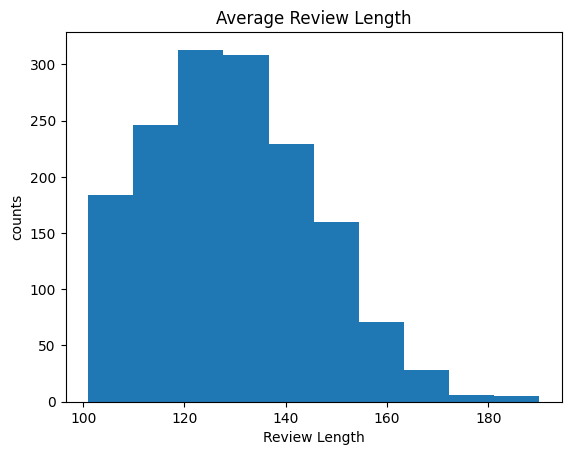

In [ ]:
# Group the data by year and calculate the average review length for each year
list_lens =df_copy['review_length'].tolist()
# Plot the average review length over time
plt.hist(list_lens)
plt.title('Average Review Length')
plt.ylabel('counts')
plt.xlabel('Review Length')
plt.show()

### 3.4) POS stats

In [ ]:
"""Part-of-speech (POS) statistics involve analyzing the frequency and distribution 
of different parts of speech in a text. POS statistics can provide insights into the writing style,
 genre, and complexity of a text. Here's how you can compute POS statistics in Python:"""

In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize

tokens = word_tokenize(clean_txt[0])

In [ ]:
from nltk import pos_tag
pos_tags = pos_tag(tokens)

In [ ]:
#Count the frequency of each POS tag using Python's Counter class:
from collections import Counter
pos_counts = Counter(tag for word, tag in pos_tags)

In [ ]:
# Compute the distribution of each POS tag by dividing its count by the total number of tokens:
pos_distribution = {tag: count/len(pos_tags) for tag, count in pos_counts.items()}


In [ ]:
# Print the results
print("POS tag frequency:", pos_counts)
print("POS tag distribution:", pos_distribution)

POS tag frequency: Counter({'NN': 5, 'VBD': 2, 'VBG': 1, 'JJ': 1, 'IN': 1, 'VBN': 1, 'MD': 1})
POS tag distribution: {'VBG': 0.08333333333333333, 'JJ': 0.08333333333333333, 'NN': 0.4166666666666667, 'IN': 0.08333333333333333, 'VBD': 0.16666666666666666, 'VBN': 0.08333333333333333, 'MD': 0.08333333333333333}


In [ ]:
## now on the entire corpus:
# Tokenize each document into individual words
all_tokens = [word_tokenize(doc) for doc in clean_txt]

# Apply the POS tagger to the tokens in each document
all_pos_tags = [pos_tag(tokens) for tokens in all_tokens]

# Count the frequency of each POS tag in all documents
all_pos_counts = Counter(tag for pos_tags in all_pos_tags for word, tag in pos_tags)

# Compute the distribution of each POS tag in all documents
all_pos_distribution = {tag: count/sum(all_pos_counts.values()) for tag, count in all_pos_counts.items()}

# Print the results
print("POS tag frequency:", all_pos_counts)
print("POS tag distribution:", all_pos_distribution)


POS tag frequency: Counter({'NN': 6803, 'JJ': 4130, 'RB': 1409, 'NNS': 1384, 'VBD': 937, 'VB': 650, 'VBN': 626, 'VBP': 610, 'VBG': 602, 'MD': 332, 'IN': 303, 'VBZ': 276, 'CD': 242, 'JJS': 170, 'JJR': 74, 'RBR': 52, 'DT': 50, 'RP': 13, 'CC': 12, 'RBS': 12, 'FW': 7, 'NNP': 6, 'PRP': 6, 'TO': 2, 'WDT': 2, 'PDT': 1, 'PRP$': 1})
POS tag distribution: {'VBG': 0.03217186831979479, 'JJ': 0.22071398033347583, 'NN': 0.36356348867037197, 'IN': 0.01619281744335186, 'VBD': 0.05007481829841813, 'VBN': 0.033454467721248396, 'MD': 0.01774262505344164, 'NNS': 0.07396323215049166, 'VBZ': 0.014749893116716546, 'RB': 0.07529927319367251, 'VB': 0.03473706712270201, 'JJS': 0.009085079093629756, 'VBP': 0.032599401453612654, 'RBR': 0.0027789653698161608, 'CD': 0.012932877297990595, 'NNP': 0.0003206498503634032, 'DT': 0.002672082086361693, 'RP': 0.0006947413424540402, 'JJR': 0.003954681487815305, 'FW': 0.000374091492090637, 'CC': 0.0006412997007268063, 'RBS': 0.0006412997007268063, 'PRP': 0.0003206498503634032

# DRAFTS

In [ ]:
## DRAFTS ######################


In [ ]:
## more imports
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

Let's try another model for supervised classification of sentiment score:

In [ ]:
## BERT FINE TUNE ON OUR DATA: ## VERY SLOW #####


# Load the pre-trained BERT model and tokenizer
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# Load the dataset
df = pd.read_csv("df_filtered.csv")

# Split the dataset into training and testing sets
train_text, test_text, train_labels, test_labels = train_test_split(df["txt"], df["sentiment"], test_size=0.2, random_state=42)

# Tokenize the text and create input tensors for the model
train_tokens = tokenizer.batch_encode_plus(train_text.tolist(), max_length=128, pad_to_max_length=True, truncation=True)
test_tokens = tokenizer.batch_encode_plus(test_text.tolist(), max_length=128, pad_to_max_length=True, truncation=True)

train_seq = torch.tensor(train_tokens['input_ids'])
train_mask = torch.tensor(train_tokens['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

test_seq = torch.tensor(test_tokens['input_ids'])
test_mask = torch.tensor(test_tokens['attention_mask'])
test_y = torch.tensor(test_labels.tolist())



Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
# Check for the availability of a GPU, and use CPU otherwise
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

NameError: ignored

In [ ]:
# Create a PyTorch DataLoader for the training and testing sets
batch_size = 32
train_data = TensorDataset(train_seq, train_mask, train_y)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

test_data = TensorDataset(test_seq, test_mask, test_y)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

# Set the optimizer and learning rate for fine-tuning the model
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)



In [ ]:
# Fine-tune the model on the training set
%%time 
epochs = 4
for epoch in range(epochs):
    for step, batch in enumerate(train_dataloader):
        batch_seq = batch[0].to(device)
        batch_mask = batch[1].to(device)
        batch_y = batch[2].to(device)

        model.zero_grad()
        outputs = model(batch_seq, attention_mask=batch_mask, labels=batch_y)
        loss = outputs[0]
        loss.backward()
        optimizer.step()

# Evaluate the model on the testing set
model.eval()
predictions = []
with torch.no_grad():
    for batch in test_dataloader:
        batch_seq = batch[0].to(device)
        batch_mask = batch[1].to(device)
        batch_y = batch[2].to(device)

        outputs = model(batch_seq, attention_mask=batch_mask)
        logits = outputs[0]
        preds = torch.argmax(logits, dim=1)
        predictions.extend(preds.cpu().detach().numpy())

accuracy = accuracy_score(test_y.numpy(), predictions)
print("Accuracy: {:.2f}%".format(accuracy*100))

KeyboardInterrupt: ignored